In [83]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import keras.models
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten
from keras import metrics
from keras.utils.vis_utils import plot_model
import os

In [2]:
# Key:
# 0 - Down
# 1 - Up
# 2 - Wave

small_to_large_image_size_ratio = 0.05

X_train = []
X_test = []
Y_train = []
Y_test = []

source_directory = "dataset/thumbsdown/KeyFrames/train"
for filename in os.listdir(source_directory):
    image = cv2.imread(source_directory + "/" + filename)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


    image = cv2.resize(image,  # original image
                           (0, 0),  # set fx and fy, not the final size
                           fx=small_to_large_image_size_ratio,
                           fy=small_to_large_image_size_ratio,
                           interpolation=cv2.INTER_NEAREST)
    # image = random_noise(image, mode='s&p', amount=0.011)

    X_train.append(image)
    Y_train.append(0)

source_directory = "dataset/thumbsup/KeyFrames/train"
for filename in os.listdir(source_directory):
    image = cv2.imread(source_directory + "/" + filename)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    image = cv2.resize(image,  # original image
                           (0, 0),  # set fx and fy, not the final size
                           fx=small_to_large_image_size_ratio,
                           fy=small_to_large_image_size_ratio,
                           interpolation=cv2.INTER_NEAREST)
    # image = random_noise(image, mode='s&p', amount=0.011)

    X_train.append(image)
    Y_train.append(1)

source_directory = "dataset/wave/KeyFrames/train"
for filename in os.listdir(source_directory):
    image = cv2.imread(source_directory + "/" + filename)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    image = cv2.resize(image,  # original image
                           (0, 0),  # set fx and fy, not the final size
                           fx=small_to_large_image_size_ratio,
                           fy=small_to_large_image_size_ratio,
                           interpolation=cv2.INTER_NEAREST)
    # image = random_noise(image, mode='s&p', amount=0.011)

    X_train.append(image)
    Y_train.append(2)

source_directory = "dataset/thumbsdown/KeyFrames/test"
for filename in os.listdir(source_directory):
    image = cv2.imread(source_directory + "/" + filename)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    image = cv2.resize(image,  # original image
                           (0, 0),  # set fx and fy, not the final size
                           fx=small_to_large_image_size_ratio,
                           fy=small_to_large_image_size_ratio,
                           interpolation=cv2.INTER_NEAREST)
    # image = random_noise(image, mode='s&p', amount=0.011)

    X_test.append(image)
    Y_test.append(0)

source_directory = "dataset/thumbsup/KeyFrames/test"
for filename in os.listdir(source_directory):
    image = cv2.imread(source_directory + "/" + filename)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    image = cv2.resize(image,  # original image
                           (0, 0),  # set fx and fy, not the final size
                           fx=small_to_large_image_size_ratio,
                           fy=small_to_large_image_size_ratio,
                           interpolation=cv2.INTER_NEAREST)
    # image = random_noise(image, mode='s&p', amount=0.011)

    X_test.append(image)
    Y_test.append(1)

source_directory = "dataset/wave/KeyFrames/test"
for filename in os.listdir(source_directory):
    image = cv2.imread(source_directory + "/" + filename)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    image = cv2.resize(image,  # original image
                           (0, 0),  # set fx and fy, not the final size
                           fx=small_to_large_image_size_ratio,
                           fy=small_to_large_image_size_ratio,
                           interpolation=cv2.INTER_NEAREST)
    # image = random_noise(image, mode='s&p', amount=0.011)
    X_test.append(image)
    Y_test.append(2)


print(np.shape(X_train))
print(np.shape(X_test))

(1855, 54, 96)
(219, 54, 96)


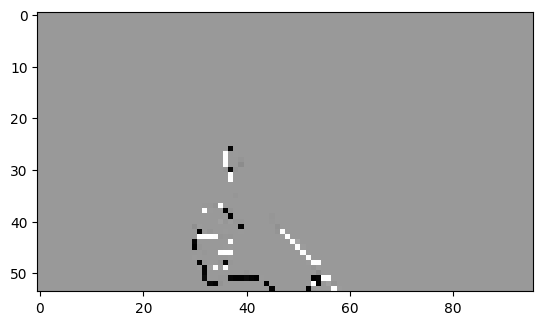

In [24]:
train_size = np.shape(X_train)
imheight = train_size[1]
imwidth = train_size[2]
train_size = train_size[0]
test_size = np.shape(X_test)[0]

X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

X_train = X_train.reshape(train_size, imheight, imwidth, 1)
X_test = X_test.reshape(test_size, imheight, imwidth, 1)
Y_train = Y_train.reshape(train_size)
Y_test = Y_test.reshape(test_size)

plt.imshow(X_test[100].reshape(imheight, imwidth),cmap='Greys')

In [133]:
model = Sequential()

# add model layers
model.add(Conv2D(8, kernel_size=7, activation='relu', input_shape=(imheight, imwidth, 1)))
model.add(Conv2D(8, kernel_size=7, activation='relu'))
model.add(Conv2D(8, kernel_size=7, activation='relu'))
model.add(Dropout(0.05))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.summary()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 48, 90, 8)         400       
                                                                 
 conv2d_37 (Conv2D)          (None, 42, 84, 8)         3144      
                                                                 
 conv2d_38 (Conv2D)          (None, 36, 78, 8)         3144      
                                                                 
 dropout_12 (Dropout)        (None, 36, 78, 8)         0         
                                                                 
 flatten_12 (Flatten)        (None, 22464)             0         
                                                                 
 dense_12 (Dense)            (None, 3)                 67395     
                                                                 
Total params: 74,083
Trainable params: 74,083
Non-tra

In [134]:
n_epochs = 10
history = model.fit(x=X_train,y=Y_train, epochs=n_epochs)

Epoch 1/10
58/58 [==============================] - 8s 114ms/step - loss: 1.1359 - accuracy: 0.7601
Epoch 2/10
58/58 [==============================] - 19s 337ms/step - loss: 0.0814 - accuracy: 0.9747
Epoch 3/10
58/58 [==============================] - 28s 495ms/step - loss: 0.0263 - accuracy: 0.9941
Epoch 4/10
58/58 [==============================] - 14s 228ms/step - loss: 0.0142 - accuracy: 0.9973
Epoch 5/10
58/58 [==============================] - 6s 111ms/step - loss: 0.0036 - accuracy: 0.9995
Epoch 6/10
58/58 [==============================] - 6s 110ms/step - loss: 0.0020 - accuracy: 0.9995
Epoch 7/10
58/58 [==============================] - 6s 110ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 8/10
58/58 [==============================] - 7s 113ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 9/10
58/58 [==============================] - 6s 111ms/step - loss: 8.8694e-04 - accuracy: 1.0000
Epoch 10/10
58/58 [==============================] - 7s 112ms/step - loss: 6.1695e-04 - accur

In [135]:
score = model.evaluate(X_test, Y_test)
print('Test accuracy:', score[1])

7/7 [==============================] - 0s 22ms/step - loss: 0.0405 - accuracy: 0.9863
Test accuracy: 0.9863013625144958


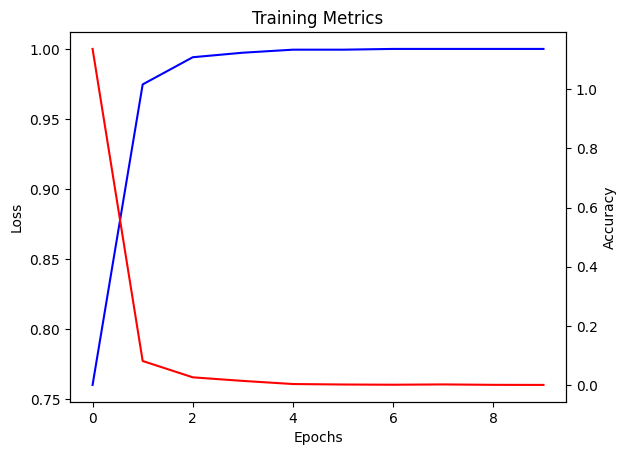

In [136]:
fig, ax = plt.subplots()
ax.plot(history.history['accuracy'], color='b')
ax2 = ax.twinx()
ax2.plot(history.history['loss'], color='r')
ax.set_ylabel('Loss')
ax2.set_ylabel('Accuracy')
ax.title.set_text('Training Metrics')
ax.set_xlabel("Epochs")
# ax.legend(['accuracy', 'loss'], loc='upper right')
plt.show()

In [138]:
model.save("CNN_model")

INFO:tensorflow:Assets written to: CNN_model\assets


INFO:tensorflow:Assets written to: CNN_model\assets


In [139]:
saved_model = keras.models.load_model("CNN_model")
score = saved_model.evaluate(X_test, Y_test)
print('Test accuracy:', score[1])

7/7 [==============================] - 1s 28ms/step - loss: 0.0405 - accuracy: 0.9863
Test accuracy: 0.9863013625144958


In [137]:

def calc_Categorical_Accuracy(test, truth):
    print(len(truth))
    certainty = model.predict(test, verbose=0)
    decision = np.argmax(certainty, axis=1)  # find index of max probability

    categorical_accuracy = np.zeros(shape=(3,))
    for i in range(len(decision)):
      if decision[i] == truth[i]:
          categorical_accuracy[truth[i]] = categorical_accuracy[truth[i]]+1

    for i in range(3):
        num_tests = truth.tolist().count(i)
        categorical_accuracy[i] = categorical_accuracy[i]/num_tests
    return categorical_accuracy

acc = calc_Categorical_Accuracy(X_test, Y_test)
print(acc)

acc = calc_Categorical_Accuracy(X_train, Y_train)
print(acc)

219
[1.         1.         0.96842105]
1855
[1. 1. 1.]
